In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

### Reading the Dataset

In [2]:
data = pd.read_csv('White_Plains_NYC.csv')
data.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,MLS Listing,NaN,Single Family Residential,63 Jared Dr,White Plains,NY,10605,849000,3.0,3.0,...,Active,NaN,NaN,http://www.redfin.com/NY/White-Plains/63-Jared...,OneKey,H6019318,N,Y,41.005312,-73.754431
1,MLS Listing,NaN,Single Family Residential,138 Rosedale Ave,White Plains,NY,10605,1295000,4.0,3.5,...,Active,NaN,NaN,http://www.redfin.com/NY/White-Plains/138-Rose...,OneKey,H6040378,N,Y,40.993136,-73.743901
2,MLS Listing,NaN,Condo/Co-op,107 Winding Ridge Rd,White Plains,NY,10603,825000,4.0,3.5,...,Active,NaN,NaN,http://www.redfin.com/NY/White-Plains/107-Wind...,OneKey,H6040647,N,Y,41.044967,-73.785415
3,MLS Listing,NaN,Single Family Residential,15 Kenilworth Rd,Rye,NY,10580,1748999,5.0,4.5,...,Active,NaN,NaN,http://www.redfin.com/NY/Rye/15-Kenilworth-Rd-...,OneKey,H6040655,N,Y,41.001077,-73.722203
4,MLS Listing,NaN,Condo/Co-op,10 Bryant Cres Unit 1N,White Plains,NY,10605,259900,2.0,1.0,...,Active,NaN,NaN,http://www.redfin.com/NY/White-Plains/10-Bryan...,OneKey,H6039442,N,Y,41.019627,-73.750702


In [3]:
data.shape

(253, 27)

### check if there are any null values in the dataset

In [5]:
data.isna().sum()

SALE TYPE                                                                                       0
SOLD DATE                                                                                     253
PROPERTY TYPE                                                                                   0
ADDRESS                                                                                         0
CITY                                                                                            0
STATE OR PROVINCE                                                                               0
ZIP OR POSTAL CODE                                                                              0
PRICE                                                                                           0
BEDS                                                                                            1
BATHS                                                                                           7
LOCATION            

#### 1. One thing here we can note is that features 'SOLD DATE','NEXT OPEN HOUSE START TIME' AND 'NEXT OPEN HOUSE END TIME' is complete empty

In [7]:
data.drop(['SOLD DATE','NEXT OPEN HOUSE START TIME','NEXT OPEN HOUSE END TIME'],axis=1,inplace=True)

In [16]:
data.drop(['ADDRESS','CITY','STATE OR PROVINCE','ZIP OR POSTAL CODE','LOCATION',
           'URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)'],axis=1,inplace=True)

In [17]:
data.isna().sum()

SALE TYPE           0
PROPERTY TYPE       0
PRICE               0
BEDS                1
BATHS               7
SQUARE FEET         6
LOT SIZE           91
YEAR BUILT          7
DAYS ON MARKET      0
$/SQUARE FEET       6
HOA/MONTH         128
STATUS              0
SOURCE              0
MLS#                0
FAVORITE            0
INTERESTED          0
LATITUDE            0
LONGITUDE           0
dtype: int64

In [25]:
data.drop(['LATITUDE','LONGITUDE','INTERESTED','FAVORITE','MLS#','SOURCE'],axis=1,inplace=True)

In [26]:
data.isna().sum()

SALE TYPE           0
PROPERTY TYPE       0
PRICE               0
BEDS                1
BATHS               7
SQUARE FEET         6
LOT SIZE           91
YEAR BUILT          7
DAYS ON MARKET      0
$/SQUARE FEET       6
HOA/MONTH         128
STATUS              0
dtype: int64

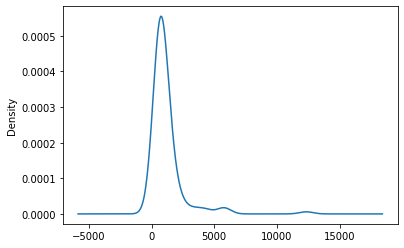

In [33]:
data['HOA/MONTH'].plot(kind='kde')

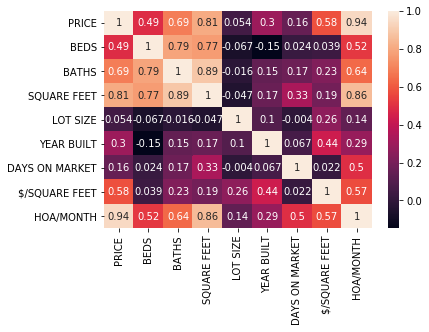

In [32]:
sns.heatmap(data.corr(),annot=True)

### Lets do the Mean, Median, Random sample and end of distributon imputation

In [34]:
data['HOA_mean'] = data['HOA/MONTH'].fillna(value = data['HOA/MONTH'].mean())
data['HOA_median'] = data['HOA/MONTH'].fillna(value = data['HOA/MONTH'].median())

1182.2


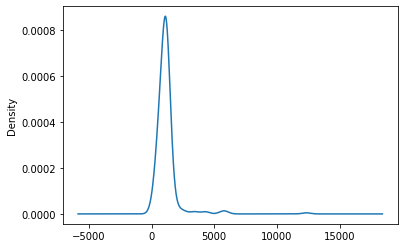

In [36]:
data['HOA_mean'].plot(kind='kde')
print(data['HOA/MONTH'].mean())

796.0


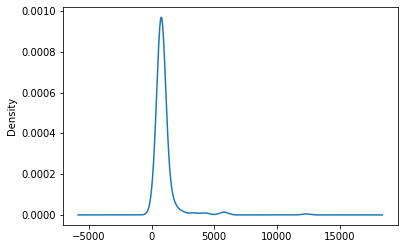

In [37]:
data['HOA_median'].plot(kind='kde')
print(data['HOA/MONTH'].median())

In [77]:
data['HOA_random'] = data['HOA/MONTH'].copy()

In [86]:
values = data['HOA_random'].dropna().sample(data['HOA/MONTH'].isna().sum(),random_state=0,replace=True)

In [87]:
random_sample = data.loc[data['HOA/MONTH'].isna()].index

### end of distribution method

In [92]:
value = data['HOA/MONTH'].mean() + 3*data['HOA/MONTH'].std()
value

5467.262046451076

In [93]:
data['HOA_end'] = data['HOA/MONTH'].fillna(value=value)

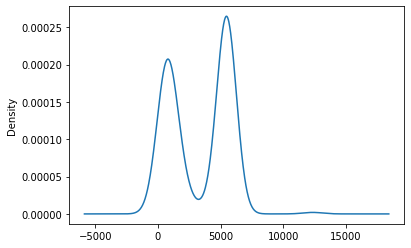

In [96]:
data['HOA_end'].plot(kind='kde')

In [97]:
data.drop(['HOA_end','HOA_random','HOA_median'],axis=1,inplace=True)

In [99]:
data['HOA/MONTH'].fillna(value = data['HOA/MONTH'].mean(),inplace=True)

In [100]:
data.drop(['HOA_mean'],axis=1,inplace=True)

In [101]:
data.isna().sum()

SALE TYPE          0
PROPERTY TYPE      0
PRICE              0
BEDS               1
BATHS              7
SQUARE FEET        6
LOT SIZE          91
YEAR BUILT         7
DAYS ON MARKET     0
$/SQUARE FEET      6
HOA/MONTH          0
STATUS             0
dtype: int64

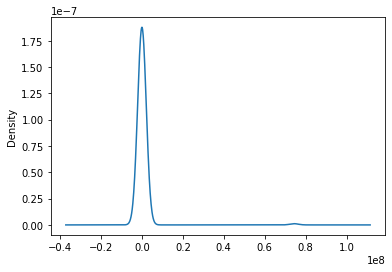

In [103]:
data['LOT SIZE'].plot(kind='kde')

In [108]:
data['LOT SIZE'].fillna(value=data['LOT SIZE'].mean(),inplace=True)

In [112]:
data['YEAR BUILT'].fillna(value=data['YEAR BUILT'].median(),inplace=True)

In [114]:
data['AGE'] = 2020 - data['YEAR BUILT']

In [115]:
data.drop('YEAR BUILT',axis=1,inplace=True)

In [116]:
data.isna().sum()

SALE TYPE         0
PROPERTY TYPE     0
PRICE             0
BEDS              1
BATHS             7
SQUARE FEET       6
LOT SIZE          0
DAYS ON MARKET    0
$/SQUARE FEET     6
HOA/MONTH         0
STATUS            0
AGE               0
dtype: int64

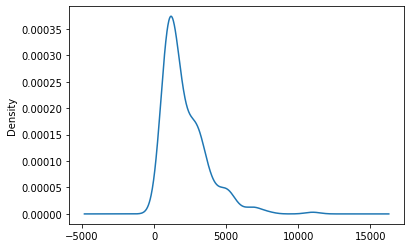

In [119]:
data['SQUARE FEET'].plot(kind='kde')

In [123]:
data['SQUARE FEET'].fillna(value=data['SQUARE FEET'].mean(),inplace=True)

In [130]:
data['BATHS'].fillna(value=data['BATHS'].mean(),inplace=True)

In [131]:
data.shape

(253, 12)

In [134]:
data.isna().sum()

SALE TYPE         0
PROPERTY TYPE     0
PRICE             0
BEDS              1
BATHS             0
SQUARE FEET       0
LOT SIZE          0
DAYS ON MARKET    0
$/SQUARE FEET     6
HOA/MONTH         0
STATUS            0
AGE               0
dtype: int64

In [135]:
data.dropna(inplace=True)

In [136]:
data.isna().sum()

SALE TYPE         0
PROPERTY TYPE     0
PRICE             0
BEDS              0
BATHS             0
SQUARE FEET       0
LOT SIZE          0
DAYS ON MARKET    0
$/SQUARE FEET     0
HOA/MONTH         0
STATUS            0
AGE               0
dtype: int64

In [140]:
data.drop(['SALE TYPE'],axis=1,inplace=True)

In [139]:
data['PROPERTY TYPE'].value_counts()

Single Family Residential    117
Condo/Co-op                  116
Multi-Family (2-4 Unit)       13
Name: PROPERTY TYPE, dtype: int64

In [141]:
data.select_dtypes(['object']).columns

Index(['PROPERTY TYPE', 'STATUS'], dtype='object')

In [144]:
data.drop('STATUS',axis=1,inplace=True)

In [146]:
data.columns

Index(['PROPERTY TYPE', 'PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE',
       'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'AGE'],
      dtype='object')

In [147]:
data.head()

,PROPERTY TYPE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,AGE
0,Single Family Residential,849000,3.0,3.0,2597.0,1921.000000,74,327.0,550.0,33.0
1,Single Family Residential,1295000,4.0,3.5,3257.0,9056.000000,1,398.0,1182.2,0.0
2,Condo/Co-op,825000,4.0,3.5,3000.0,436.000000,3,275.0,500.0,19.0
3,Single Family Residential,1748999,5.0,4.5,4200.0,113840.000000,3,416.0,1182.2,68.0
4,Condo/Co-op,259900,2.0,1.0,950.0,480313.055556,3,274.0,1094.0,68.0


In [148]:
property_type = pd.get_dummies(data['PROPERTY TYPE'],drop_first=True)

In [149]:
data = pd.concat([data.drop('PROPERTY TYPE',axis=1),property_type],axis=1)

In [156]:
X = data.drop('PRICE',axis=1)
y = data['PRICE']

In [159]:
X = np.array(X)
y = np.array(y)

In [166]:
X_values = np.append(arr=np.ones((data.shape[0],1)),values = X,axis=1)

In [167]:
w = np.linalg.solve(X_values.T.dot(X_values),X_values.T.dot(y))

In [168]:
Yhat = X_values.dot(w)

In [170]:
d1 =  y -Yhat
d2 = y - y.mean()

r2 = 1 - (d1.dot(d1) / d2.dot(d2))
print(r2)

0.9597679984726688


In [171]:
y = np.log(y)

In [172]:
w_1 = np.linalg.solve(X_values.T.dot(X_values),X_values.T.dot(y))

In [173]:
Yhat_1 = X_values.dot(w_1)

In [174]:
d1 =  y -Yhat_1
d2 = y - y.mean()

r2 = 1 - (d1.dot(d1) / d2.dot(d2))
print(r2)

0.9430099121900518


### lets check if there are any outliers in the datset or not ?

In [181]:
len(data['PRICE'] > x)

246

In [180]:
x = data['PRICE'].mean() + 3* data['PRICE'].std()

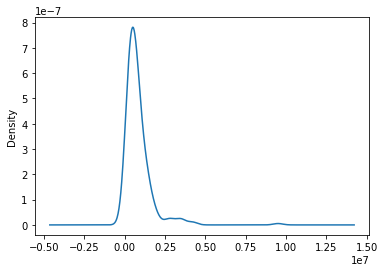

In [183]:
data['PRICE'].plot(kind='kde')

### Going via scikit learn method

In [186]:
from sklearn.model_selection import train_test_split

In [187]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [188]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((172, 10), (74, 10), (172,), (74,))

In [189]:
from sklearn.linear_model import LinearRegression

In [190]:
LR = LinearRegression()

In [191]:
LR.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [192]:
y_pred = LR.predict(X_test)

In [193]:
from sklearn.metrics import r2_score

In [194]:
print(r2_score(Y_test,y_pred))

0.92327729540575


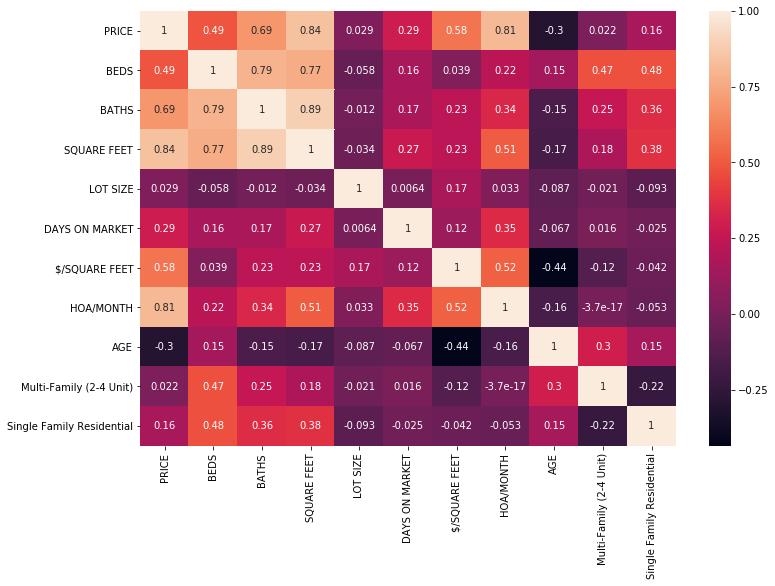

In [197]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)

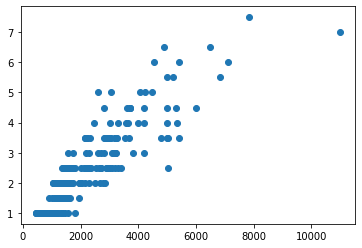

In [198]:
plt.scatter(data['SQUARE FEET'],data['BATHS'])

In [202]:
m = data['PRICE'] > x

In [203]:
data[m]

,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,AGE,Multi-Family (2-4 Unit),Single Family Residential
148,3495000,7.0,6.0,7106.0,21209.000000,103,492.0,1182.2,0.0,0,1
193,3495000,7.0,7.5,7853.0,21780.000000,140,445.0,1182.2,0.0,0,1
194,9500000,6.0,7.0,11000.0,480313.055556,147,864.0,12340.0,12.0,0,0
239,4195000,3.0,2.5,5030.0,480313.055556,411,834.0,5611.0,13.0,0,0
248,4200000,3.0,3.5,5403.0,480313.055556,802,777.0,5853.0,12.0,0,0
249,3500000,4.0,3.5,5038.0,480313.055556,844,695.0,5848.0,12.0,0,0


In [205]:
6/240*100

# So basically we have 2.5% of data as outliers in our dataset.So we can have

2.5

In [207]:
x1 = data['PRICE'].mean() - 3*data['PRICE'].std()
x1

-1855977.5367201196

### What we can do is we can clip our dataset or we can replace it with value of 'x'

In [208]:
data['PRICE_new'] = np.where(data['PRICE']>x,x,(np.where(data['PRICE'] < x1,x1,data['PRICE'])))

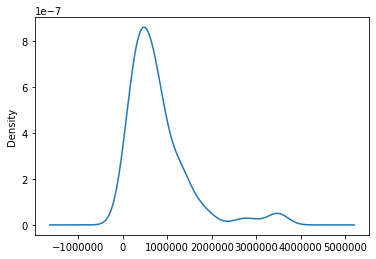

In [212]:
data['PRICE_new'].plot(kind='kde')

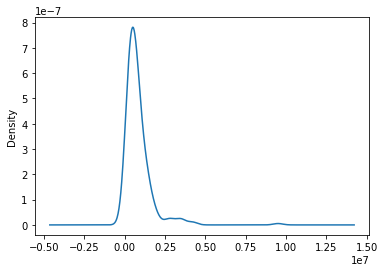

In [213]:
data['PRICE'].plot(kind='kde')